In [1]:
import pandas as pd
import dostoevsky
import string
import re
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

Предварительно в командной строке нужно сделать: python3 -m dostoevsky download fasttext-social-network-model

In [2]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [3]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [4]:
df=pd.DataFrame()
df['date_num']=list(range(16071, 19723, 1))
df['date']=pd.date_range('2014-01-01', '2023-12-31')
df=df.set_index('date_num')
df['num_c']=0
df['num_c_with']=0
df['sum_mood']=0
df['sum_mood_with']=0

Рассматриваемый временной промежуток:

00:00:00 01.01.2014 = 1388534400

00:00:00 01.01.2024 = 1704067200

In [5]:
df=pd.DataFrame()
df['date_num']=list(range(16071, 19723, 1))
df['date']=pd.date_range('2014-01-01', '2023-12-31')
df=df.set_index('date_num')
df['num_c']=0
df['num_c_with']=0
df['sum_mood']=0
df['sum_mood_with']=0

In [6]:
def work_with_comments(comments):
    comments=comments[comments['text'].notna()]
    comments=comments.reset_index()
    comments=comments.drop(columns=['index'])
    comments['clean_text']=''
    comments['keyword_i']=0
    comments['mood']=0
    i=0
    for i in range (len(comments)):
        c=0
        s=comments.iloc[i]['text']
        s=str(s)
        s=s.lower()
        for p in string.punctuation:
            if p in s:
                s=s.replace(p, '')
        s=s.replace('\n', ' ')
        comments.loc[i,'clean_text']=s
        c=bool(re.search(r'банк россии|банка россии|банку россии|банком россии|банке россии|цб|центробанк|центральный банк|центрального банка|центральному банку|центральным банком|центральном банке|набиуллин', s))
        comments.loc[i,'keyword_i']=comments['keyword_i'][i]+c
        message=[comments.iloc[i]['text']]
        results = model.predict(message, k=5)
        comments.loc[i,'mood']=results[0]['positive']-results[0]['negative']
    return comments

In [7]:
def make_df_per_day(comments):
    for i in range(len(comments)):
        if (comments['comment_time'][i]<1704067200 and comments['comment_time'][i]>1388534400):
            df.loc[comments['comment_time'][i]//86400, 'num_c']=df['num_c'][comments['comment_time'][i]//86400]+1
            df.loc[comments['comment_time'][i]//86400,'sum_mood']=df.loc[comments['comment_time'][i]//86400,'sum_mood']+comments['mood'][i]
            if comments['keyword_i'][i]==1:
                df.loc[comments['comment_time'][i]//86400, 'num_c_with']=df['num_c_with'][comments['comment_time'][i]//86400]+1
                df.loc[comments['comment_time'][i]//86400,'sum_mood_with']=df.loc[comments['comment_time'][i]//86400,'sum_mood_with']+comments['mood'][i]
    return df

# aif_ru

In [8]:
data=pd.read_csv('aif_ru_all_comments.csv')
data=work_with_comments(data)
data.to_csv('aif_ru_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1138693,что уже Дальневосточный льготный гектар никому...,1584453896,11298783,что уже дальневосточный льготный гектар никому...,0,-0.277056
1,2236421,"Ввезти ведь,а не вывезти!",1692304548,691425151,ввезти ведьа не вывезти,0,-0.022533
2,2236421,"Не хотят наши власти, чтоб людям жилось хорошо...",1692321591,548839550,не хотят наши власти чтоб людям жилось хорошо ...,0,-0.117484
3,2236421,"Клоун что хотел кого-то подкупать тут, очередн...",1692322774,676449624,клоун что хотел когото подкупать тут очередных...,0,-0.143179
4,2236421,Где-то заработал и решил ввести?----Надо разби...,1692326408,710233104,гдето заработал и решил ввестинадо разбираться...,0,-0.167377
...,...,...,...,...,...,...,...
28089,1073150,"Хотя ответ известен:"" денег нет, но вы держите...",1563785656,308977373,хотя ответ известен денег нет но вы держитесь ...,0,-0.161904
28090,1073150,Очень некорректное сравнение. Нужно не чистый ...,1563786877,170470789,очень некорректное сравнение нужно не чистый д...,0,-0.199606
28091,1073150,Акакий неадекват ?),1563787960,243537564,акакий неадекват,0,-0.125505
28092,1073150,"РФ способна расплатиться с долгами, а США нет...",1563797118,279362575,рф способна расплатиться с долгами а сша нет,0,-0.028024


In [9]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.00000
16072,2014-01-02,0,0,0.000000,0.00000
16073,2014-01-03,0,0,0.000000,0.00000
16074,2014-01-04,0,0,0.000000,0.00000
16075,2014-01-05,0,0,0.000000,0.00000
...,...,...,...,...,...
19718,2023-12-27,158,0,-14.495072,0.00000
19719,2023-12-28,79,1,-10.340452,-0.10855
19720,2023-12-29,82,0,-13.484186,0.00000


# expert_ru

In [10]:
data=pd.read_csv('expert_ru_all_comments.csv')
data=work_with_comments(data)
data.to_csv('expert_ru_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,262150,"Уинстон Черчеилль, став премьер-министром Вели...",1677989646,461379477,уинстон черчеилль став премьерминистром велико...,0,-0.207709
1,262150,Я знаю хорошую лечебницу где могут подлечить т...,1677995725,720738261,я знаю хорошую лечебницу где могут подлечить т...,0,0.219059
2,65544,поэтому у нас борьба с инфляцией превращается ...,1402837915,21083339,поэтому у нас борьба с инфляцией превращается ...,0,-0.123817
3,65544,Это что то новенькое. А инфляцию потушить мож...,1402838179,4481124,это что то новенькое а инфляцию потушить можн...,0,0.062903
4,65544,"[id4481124|Виктор], смотри на график роста ден...",1402839696,20583659,id4481124виктор смотри на график роста денежно...,0,0.056143
...,...,...,...,...,...,...,...
6223,114660,Все смотрим фильм Счастливые люди! И мозг вста...,1436865550,155121805,все смотрим фильм счастливые люди и мозг встаё...,0,0.730736
6224,188393,Да че СМИ и правозащитники это гав...но уже 3 ...,1485808866,2803731,да че сми и правозащитники это гавно уже 3 ден...,0,-0.345440
6225,188393,"[id2803731|Антон], у них другие принципы",1485815980,2447205,id2803731антон у них другие принципы,0,-0.020047
6226,188393,В России бы тоже не помешало ввести такие запреты,1485839156,45368917,в россии бы тоже не помешало ввести такие запреты,0,-0.236238


In [11]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.00000
16072,2014-01-02,0,0,0.000000,0.00000
16073,2014-01-03,0,0,0.000000,0.00000
16074,2014-01-04,0,0,0.000000,0.00000
16075,2014-01-05,0,0,0.000000,0.00000
...,...,...,...,...,...
19718,2023-12-27,158,0,-14.495072,0.00000
19719,2023-12-28,80,1,-10.322466,-0.10855
19720,2023-12-29,82,0,-13.484186,0.00000


# izvestia

In [12]:
data=pd.read_csv('izvestia_all_comments.csv')
data=work_with_comments(data)
data.to_csv('izvestia_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,2916353,"Никому они не нужны , скоро за утилизацию плат...",1650095149,165153794,никому они не нужны скоро за утилизацию плати...,0,-0.669442
1,2916353,"""-Дядюшка Пердлен! Дядюшка Пердлен!\n-Что,Крош...",1650096616,488014499,дядюшка пердлен дядюшка пердлен чтокрошка зипп...,0,-0.060493
2,2916353,"Цены на все повышаются регулярно во всем мире,...",1650105674,707415200,цены на все повышаются регулярно во всем мире ...,0,-0.085242
3,4546564,"Пока цена не снизилась, может ФАС не там и не ...",1700156596,539613482,пока цена не снизилась может фас не там и не н...,0,-0.207629
4,4546564,У нас точно ни кто этим не занят в Калининград...,1700156688,78559089,у нас точно ни кто этим не занят в калининград...,0,-0.043155
...,...,...,...,...,...,...,...
16879,4743165,всех на пожизненное.,1706872502,757977634,всех на пожизненное,0,-0.017066
16880,4743165,Танком раздавят? Сожгут?,1706873567,349269962,танком раздавят сожгут,0,-0.014064
16881,4743165,Как можно было КАНАЛ организовать?,1706876498,716207057,как можно было канал организовать,0,-0.008006
16882,4743165,"Было недавно,шо опять?",1706885060,273178411,было недавношо опять,0,-0.306941


In [13]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.00000
16072,2014-01-02,0,0,0.000000,0.00000
16073,2014-01-03,0,0,0.000000,0.00000
16074,2014-01-04,0,0,0.000000,0.00000
16075,2014-01-05,0,0,0.000000,0.00000
...,...,...,...,...,...
19718,2023-12-27,206,0,-21.083261,0.00000
19719,2023-12-28,204,1,-38.306840,-0.10855
19720,2023-12-29,156,0,-32.756097,0.00000


# kommersant

In [14]:
data=pd.read_csv('kommersant_all_comments.csv')
data=work_with_comments(data)
data.to_csv('kommersant_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,3448834,Сколько на СВО ребятам поделиться?,1704626631,278307316,сколько на сво ребятам поделиться,0,-0.001944
1,3448834,Выиграл финна?,1704630487,711424050,выиграл финна,0,0.000000
2,3448834,"Да пофигу, это теннис , у меня на него аллерги...",1704638758,156062346,да пофигу это теннис у меня на него аллергия ...,0,-0.043921
3,3448834,А обзор гольфа,1704679523,15669009,а обзор гольфа,0,-0.010180
4,2228229,Если 3000 компаний с числом сотрудников в них ...,1647599648,12025189,если 3000 компаний с числом сотрудников в них ...,0,-0.251548
...,...,...,...,...,...,...,...
17205,3375096,👏👍,1700489472,417875434,👏👍,0,0.000000
17206,3375096,"Ещё один шоумен. Жди беды, страна Аргентина.",1700502879,829984708,ещё один шоумен жди беды страна аргентина,0,-0.125809
17207,3375096,Элвис,1700511011,545592400,элвис,0,0.000000
17208,3375096,А глаза пустые как у моего водителя!,1700515559,478581902,а глаза пустые как у моего водителя,0,0.037382


In [15]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,0,0,0.000000,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,215,0,-22.888533,0.000000
19719,2023-12-28,314,1,-61.199816,-0.108550
19720,2023-12-29,191,1,-38.980559,-0.227520


# mk_ru

In [16]:
data=pd.read_csv('mk_ru_all_comments.csv')
data=work_with_comments(data)
data.to_csv('mk_ru_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1507328,Коррупция в Москве и на Кавказе цветёт пышным ...,1688037038,429407576,коррупция в москве и на кавказе цветёт пышным ...,0,0.067509
1,401409,Бедный рубль...сколько его знаю все время пада...,1534319053,464699721,бедный рубльсколько его знаю все время падаети...,0,-0.798243
2,401409,"[id464699721|Ironik], это обозначает, что стан...",1534319438,236132417,id464699721ironik это обозначает что становитс...,0,-0.144000
3,401409,"[id236132417|Наталья], ну это хорошо...может и...",1534319524,464699721,id236132417наталья ну это хорошоможет и до нас...,0,-0.155953
4,401409,"[id464699721|Ironik], на том свете.",1534319832,379622292,id464699721ironik на том свете,0,0.060473
...,...,...,...,...,...,...,...
13500,1507323,"- главное, чтобы нам зарплату не стали выплачи...",1688034507,247680196,главное чтобы нам зарплату не стали выплачива...,0,-0.021273
13501,1507323,Только кордоб нам не хватает для счастья.,1688037069,429407576,только кордоб нам не хватает для счастья,0,-0.008745
13502,1359869,Правильно! В наручники их и в тюрягу!,1676039199,548201888,правильно в наручники их и в тюрягу,0,0.034717
13503,1359869,Печальный опыт СССР он наверно забыл.,1676039868,173628274,печальный опыт ссср он наверно забыл,0,-0.902502


In [17]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,233,0,-26.487737,0.000000
19719,2023-12-28,327,1,-62.996994,-0.108550
19720,2023-12-29,226,1,-44.130929,-0.227520


# rbc

In [18]:
data=pd.read_csv('rbc_all_comments.csv')
data=work_with_comments(data)
data.to_csv('rbc_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,13441026,"Остановили и ладно, потом запустят снова. Лишь...",1670060002,477316780,остановили и ладно потом запустят снова лишь б...,0,-0.130077
1,13441026,"Дед, походу, боролся с зарождением новой вселе...",1670060145,737256427,дед походу боролся с зарождением новой вселенн...,0,-0.016230
2,13441026,Троли пукинские. Смысл вашей жизни?,1670060556,296013061,троли пукинские смысл вашей жизни,0,-0.104218
3,13441026,С головой дружите?,1670060600,296013061,с головой дружите,0,-0.000804
4,13441026,Поэтому у них люди и не сидят в холодных кварт...,1670060620,461072167,поэтому у них люди и не сидят в холодных кварт...,0,-0.404518
...,...,...,...,...,...,...,...
8233,14788599,"Интересно , личные сбережения у Набиуллиной и ...",1691696421,435176278,интересно личные сбережения у набиуллиной и с...,1,-0.305279
8234,14667770,Бизнес как никто ощущает санкции и ограничения...,1689511993,751109047,бизнес как никто ощущает санкции и ограничения...,0,-0.501983
8235,14667770,да даже в таком случае люди будут покупать дол...,1689512038,365301675,да даже в таком случае люди будут покупать дол...,0,-0.421300
8236,14667770,"А потом мы удивляемся, что рубль летит вниз",1689512228,233960679,а потом мы удивляемся что рубль летит вниз,0,-0.445436


In [19]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,278,2,-30.154148,0.013564
19719,2023-12-28,355,5,-66.006600,-1.487902
19720,2023-12-29,288,5,-51.064510,-0.462978


# ria

In [20]:
data=pd.read_csv('ria_all_comments.csv')
data=work_with_comments(data)
data.to_csv('ria_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,44852228,"За доллар в Африке можно купить еды, за доллар...",1708001405,313178263,за доллар в африке можно купить еды за доллар ...,0,0.015274
1,44852228,Выдать паспорт 🪪 РФ 🇷🇺💪🏻,1708001480,789551043,выдать паспорт 🪪 рф 🇷🇺💪🏻,0,-0.111900
2,44852228,А хлеб у нас самый вкусный... Он прав..,1708001488,540059852,а хлеб у нас самый вкусный он прав,0,0.089736
3,44852228,Добро за Россией♨️🇷🇺'🔆'🇷🇺♨️°•°•,1708001496,775527547,добро за россией♨️🇷🇺🔆🇷🇺♨️°•°•,0,-0.018691
4,44852228,"В магнит ? А в Ашан на ленинском , так это отс...",1708001527,832442649,в магнит а в ашан на ленинском так это отсто...,0,-0.171105
...,...,...,...,...,...,...,...
8360,44422654,"ну и правильно, не должны наши новые регионы о...",1703878005,294230745,ну и правильно не должны наши новые регионы от...,0,-0.179780
8361,44422654,"люди сделали свой выбор и вернулись в Россию, ...",1703878672,634093383,люди сделали свой выбор и вернулись в россию т...,0,-0.045261
8362,44422654,Побольше надо вкладывать! Все равно придется в...,1703880602,516349053,побольше надо вкладывать все равно придется вс...,0,-0.211368
8363,44422654,да ща начнут виллы себе строить...,1703880961,257604939,да ща начнут виллы себе строить,0,-0.249222


In [21]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,421,2,-48.164016,0.013564
19719,2023-12-28,434,5,-70.244296,-1.487902
19720,2023-12-29,666,8,-84.980789,0.111181


# tassagency

In [22]:
data=pd.read_csv('tassagency_all_comments.csv')
data=work_with_comments(data)
data.to_csv('tassagency_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,5267463,"ну так вторичкув продают граждане, а первичку ...",1688448330,811358462,ну так вторичкув продают граждане а первичку з...,0,-0.065350
1,5267463,Да где же такие бабки взять? На кого рассчитан...,1688471867,766909518,да где же такие бабки взять на кого рассчитано...,0,-0.451342
2,4005898,Заголовок сложно читать. Пропущенный кусок... ...,1627710585,245746260,заголовок сложно читать пропущенный кусок поку...,0,-0.346303
3,4005898,"Я совершаю покупки каждый день, как минимум б...",1627744403,34327751,я совершаю покупки каждый день как минимум бе...,0,-0.040824
4,5537808,В интерфакс без якобы🤣🤣🤣,1699720384,143349623,в интерфакс без якобы🤣🤣🤣,0,-0.026393
...,...,...,...,...,...,...,...
12834,5111796,Труд на благо и во искупление!,1681714738,258657475,труд на благо и во искупление,0,0.011316
12835,4161527,А чем они хоть занимаются? Десятки каких-то до...,1636205113,397506558,а чем они хоть занимаются десятки какихто доро...,0,-0.442470
12836,4161527,"Дмитрий,где Вы такую рожицу наели?В России или...",1636209286,141760649,дмитрийгде вы такую рожицу наелив россии или в...,0,-0.168078
12837,5267455,с украины что ли запустили\nили наш-предатель ...,1688448363,811358462,с украины что ли запустили или нашпредатель ди...,0,-0.365788


In [23]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,549,2,-60.577223,0.013564
19719,2023-12-28,488,5,-76.252255,-1.487902
19720,2023-12-29,761,8,-96.650896,0.111181


# vedomosti

In [24]:
data=pd.read_csv('vedomosti_all_comments.csv')
data=work_with_comments(data)
data.to_csv('vedomosti_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1327108,"Приставы хорошо работают, но цифры я уверен да...",1633376094,13951367,приставы хорошо работают но цифры я уверен дал...,0,-0.242939
1,1327108,"Здорово, что кредиты не становятся непосильно...",1633376538,582197295,здорово что кредиты не становятся непосильной...,0,-0.114480
2,1040392,Потому что кремлевское ворье тут жить не собир...,1578831438,446568595,потому что кремлевское ворье тут жить не собир...,0,-0.221319
3,1040392,Этому эксперту как будто курсовую задали писат...,1578842111,341946526,этому эксперту как будто курсовую задали писат...,0,-0.210913
4,1671178,Я вот сильно сомневаюсь зачем нам какие дибо о...,1669297574,258045909,я вот сильно сомневаюсь зачем нам какие дибо о...,0,-0.296123
...,...,...,...,...,...,...,...
13937,1449981,Нужно сейчас предоставлять людям кредитные кан...,1651133834,706728423,нужно сейчас предоставлять людям кредитные кан...,0,-0.214670
13938,1449981,"Полтора триллиончика на 9 мая можно было бы ""П...",1651151902,660367229,полтора триллиончика на 9 мая можно было бы по...,0,0.213987
13939,1433598,а в России как дела ?,1649784689,565065176,а в россии как дела,0,-0.010014
13940,1433598,"А у нас как будто цены падают, прям каждый ден...",1649785274,404885264,а у нас как будто цены падают прям каждый день...,0,0.032994


In [25]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,552,2,-61.003883,0.013564
19719,2023-12-28,489,5,-76.177153,-1.487902
19720,2023-12-29,771,8,-98.168455,0.111181


# vesti

In [26]:
data=pd.read_csv('vesti_all_comments.csv')
data=work_with_comments(data)
data.to_csv('vesti_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,6301697,"Казачок ты наш!\nСмотри,не облажайся!",1648209842,708211077,казачок ты наш смотрине облажайся,0,0.236548
1,6301697,Ну вот и начинается.,1648209865,663920316,ну вот и начинается,0,-0.000440
2,6301697,"Турция всегда была переменчивой, сегодня подде...",1648209895,560221935,турция всегда была переменчивой сегодня поддер...,0,-0.075630
3,6301697,Ношь ф спину 😢,1648209903,648045382,ношь ф спину 😢,0,-0.075277
4,6301697,молодец,1648209979,561005377,молодец,0,0.996727
...,...,...,...,...,...,...,...
18260,8269822,"Россия регулярно участвует в саммитах, форумах...",1694504649,820376018,россия регулярно участвует в саммитах форумах ...,0,-0.118178
18261,8269822,Принял страну с курсом 23 рубля за доллар,1694506156,340377747,принял страну с курсом 23 рубля за доллар,0,-0.034262
18262,8269822,Ограничения в расчётах... Это всё идёт по план...,1694506859,464539122,ограничения в расчётах это всё идёт по плану –...,0,-0.341321
18263,8269822,Гопник.,1694507202,68378767,гопник,0,-0.001778


In [27]:
df=make_df_per_day(data)
df

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,630,2,-70.746665,0.013564
19719,2023-12-28,548,5,-85.764731,-1.487902
19720,2023-12-29,909,8,-114.535343,0.111181


In [28]:
df[df['num_c_with']>0]

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16092,2014-01-22,14,1,-2.509994,-0.276772
16098,2014-01-28,9,1,-1.757636,-0.177538
16101,2014-01-31,24,1,-5.111154,-0.015424
16104,2014-02-03,10,1,-1.940856,-0.076124
16121,2014-02-20,5,1,-1.243957,-0.230128
...,...,...,...,...,...
19717,2023-12-26,515,6,-72.302371,-0.831050
19718,2023-12-27,630,2,-70.746665,0.013564
19719,2023-12-28,548,5,-85.764731,-1.487902


In [29]:
df[df['num_c']>0]

,date,num_c,num_c_with,sum_mood,sum_mood_with
date_num,,,,,
16074,2014-01-04,1,0,-0.097274,0.000000
16077,2014-01-07,1,0,-0.051461,0.000000
16086,2014-01-16,11,0,-1.971200,0.000000
16087,2014-01-17,2,0,-0.156895,0.000000
16092,2014-01-22,14,1,-2.509994,-0.276772
...,...,...,...,...,...
19718,2023-12-27,630,2,-70.746665,0.013564
19719,2023-12-28,548,5,-85.764731,-1.487902
19720,2023-12-29,909,8,-114.535343,0.111181


In [30]:
df.to_csv('df_with_mood.csv', index=False)

# Индикатор с ежедневной частотой

In [31]:
df['mood_economy']=df['sum_mood']/df['num_c']
df['mood_cb']=df['sum_mood_with']/df['num_c_with']
df['mood_cb_without_mood_economy']=df['mood_cb']-df['mood_economy'] #значения могут находиться на отрезке [-2,2]
df['indicator']=(df['mood_cb_without_mood_economy']+2)/4 #приведение множества возможных значений индикатора к отрезку [0,1]

In [32]:
df.to_csv('df_with_mood__and_indicator.csv', index=False)

In [33]:
df=df.set_index('date')
df

,num_c,num_c_with,sum_mood,sum_mood_with,mood_economy,mood_cb,mood_cb_without_mood_economy,indicator
date,,,,,,,,
2014-01-01,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-01-02,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-01-03,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-01-04,1,0,-0.097274,0.000000,-0.097274,NaN,NaN,NaN
2014-01-05,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-27,630,2,-70.746665,0.013564,-0.112296,0.006782,0.119079,0.529770
2023-12-28,548,5,-85.764731,-1.487902,-0.156505,-0.297580,-0.141075,0.464731
2023-12-29,909,8,-114.535343,0.111181,-0.126001,0.013898,0.139899,0.534975


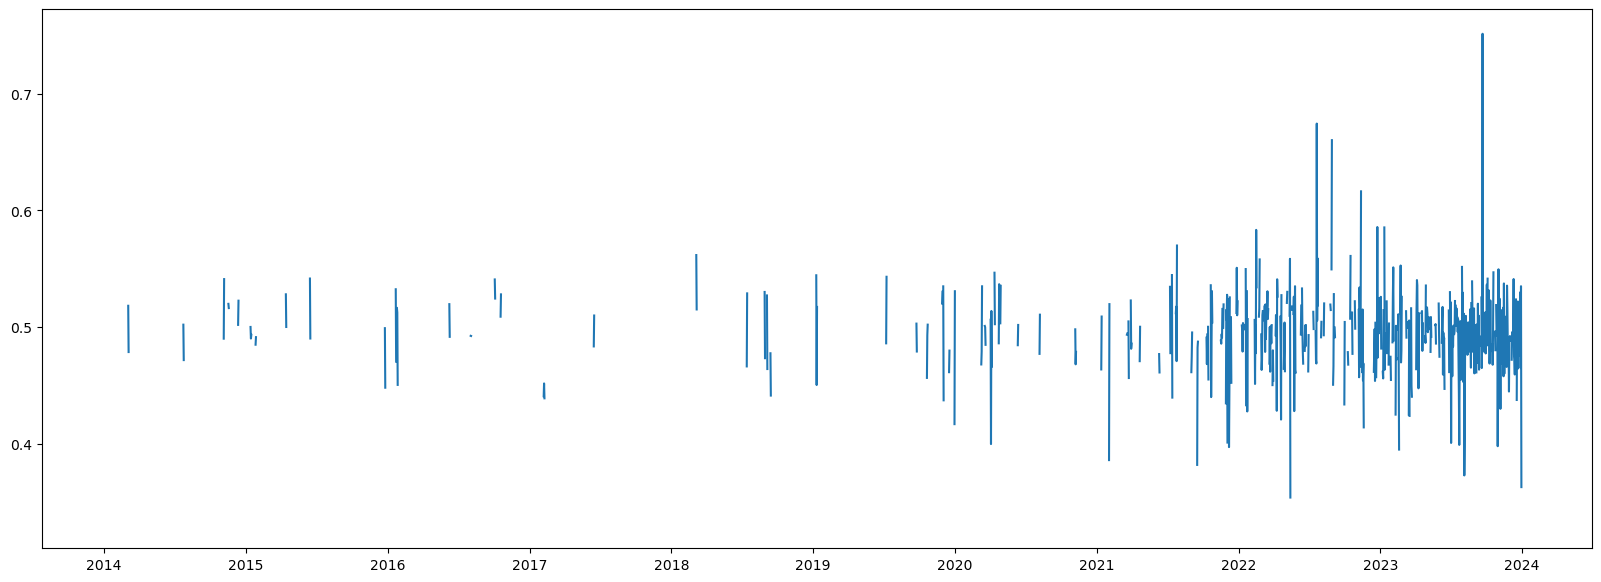

In [34]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(df['indicator'])